In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [2]:
df1 = pd.read_csv('../input/data-storm-20/Hotel-A-train.csv')
df1.head()
df2 = df1.copy()
df1.dtypes

Reservation-id             int64
Gender                    object
Age                        int64
Ethnicity                 object
Educational_Level         object
Income                    object
Country_region            object
Hotel_Type                object
Expected_checkin          object
Expected_checkout         object
Booking_date              object
Adults                     int64
Children                   int64
Babies                     int64
Meal_Type                 object
Visted_Previously         object
Previous_Cancellations    object
Deposit_type              object
Booking_channel           object
Required_Car_Parking      object
Reservation_Status        object
Use_Promotion             object
Discount_Rate              int64
Room_Rate                  int64
dtype: object

# Pre proccessing the data


In [3]:
df2.isnull().sum()

Reservation-id            0
Gender                    0
Age                       0
Ethnicity                 0
Educational_Level         0
Income                    0
Country_region            0
Hotel_Type                0
Expected_checkin          0
Expected_checkout         0
Booking_date              0
Adults                    0
Children                  0
Babies                    0
Meal_Type                 0
Visted_Previously         0
Previous_Cancellations    0
Deposit_type              0
Booking_channel           0
Required_Car_Parking      0
Reservation_Status        0
Use_Promotion             0
Discount_Rate             0
Room_Rate                 0
dtype: int64

In [4]:
#Checking for extaordinary unique values in all columns
for i in df1.columns:
  print(i, df1[i].unique())

Reservation-id [39428300 77491756 73747291 ... 52023375 98041387 55243988]
Gender ['F' 'M']
Age [40 49 42 25 62 34 53 59 21 69 52 55 22 32 45 33 43 38 18 66 44 29 54 48
 23 35 36 51 68 28 67 63 60 26 24 56 61 65 46 64 58 31 37 47 39 57 30 19
 41 20 27 70 50]
Ethnicity ['Latino' 'caucasian' 'African American' 'Asian American']
Educational_Level ['Grad' 'Mid-School' 'College' 'High-School']
Income ['<25K' '50K -- 100K' '>100K' '25K --50K']
Country_region ['North' 'East' 'South' 'West']
Hotel_Type ['City Hotel' 'Airport Hotels' 'Resort']
Expected_checkin ['7/1/2015' '7/2/2015' '7/3/2015' '5/6/2015' '4/22/2015' '6/23/2015'
 '7/5/2015' '7/6/2015' '7/7/2015' '7/8/2015' '5/11/2015' '7/15/2015'
 '7/16/2015' '5/29/2015' '5/19/2015' '6/19/2015' '5/23/2015' '5/18/2015'
 '7/9/2015' '6/2/2015' '7/13/2015' '7/4/2015' '6/29/2015' '6/16/2015'
 '6/18/2015' '6/12/2015' '6/9/2015' '5/26/2015' '7/11/2015' '7/12/2015'
 '7/17/2015' '4/15/2015' '5/13/2015' '7/10/2015' '5/20/2015' '5/12/2015'
 '7/14/2015' '6/

# Encoding the categorical variable to get statistics

In [5]:
df2.columns

Index(['Reservation-id', 'Gender', 'Age', 'Ethnicity', 'Educational_Level',
       'Income', 'Country_region', 'Hotel_Type', 'Expected_checkin',
       'Expected_checkout', 'Booking_date', 'Adults', 'Children', 'Babies',
       'Meal_Type', 'Visted_Previously', 'Previous_Cancellations',
       'Deposit_type', 'Booking_channel', 'Required_Car_Parking',
       'Reservation_Status', 'Use_Promotion', 'Discount_Rate', 'Room_Rate'],
      dtype='object')

In [6]:
#creating an instance for label encoder
labelencoder = LabelEncoder()

df2["Check_In_Day"]=pd.DatetimeIndex(df2['Expected_checkin']).day_name()
df2["Check_Out_Day"]=pd.DatetimeIndex(df2['Expected_checkout']).day_name()
df2["Check_In_Month"]=pd.DatetimeIndex(df2['Expected_checkin']).month_name()
df2["Check_Out_Month"]=pd.DatetimeIndex(df2['Expected_checkout']).month_name()


# assignning numerical values
df2["Gender"] = labelencoder.fit_transform(df2["Gender"])
df2["Ethnicity"] = labelencoder.fit_transform(df2["Ethnicity"])
df2["Educational_Level"] = labelencoder.fit_transform(df2["Educational_Level"])
df2["Income"] = labelencoder.fit_transform(df2["Income"])
df2["Country_region"] = labelencoder.fit_transform(df2["Country_region"])
df2["Hotel_Type"] = labelencoder.fit_transform(df2["Hotel_Type"])
df2["Meal_Type"] = labelencoder.fit_transform(df2["Meal_Type"])
df2["Visted_Previously"] = labelencoder.fit_transform(df2["Visted_Previously"])
df2["Previous_Cancellations"] = labelencoder.fit_transform(df2["Previous_Cancellations"])
df2["Deposit_type"] = labelencoder.fit_transform(df2["Deposit_type"])
df2["Booking_channel"] = labelencoder.fit_transform(df2["Booking_channel"])
df2["Required_Car_Parking"] = labelencoder.fit_transform(df2["Required_Car_Parking"])
df2["Reservation_Status"] = labelencoder.fit_transform(df2["Reservation_Status"])
df2["Use_Promotion"] = labelencoder.fit_transform(df2["Use_Promotion"])
df2["Check_In_Day"] = labelencoder.fit_transform(df2["Check_In_Day"])
df2["Check_Out_Day"] = labelencoder.fit_transform(df2["Check_Out_Day"])
df2["Check_In_Month"] = labelencoder.fit_transform(df2["Check_In_Month"])
df2["Check_Out_Month"] = labelencoder.fit_transform(df2["Check_Out_Month"])



In [7]:
#Standardizing the quantitative variables 
from sklearn.preprocessing import StandardScaler

df2[['Age', 'Room_Rate']] = StandardScaler().fit_transform(df2[['Age', 'Room_Rate']])

In [8]:
#Using correlation matrix to check for inner correlation

<AxesSubplot:>

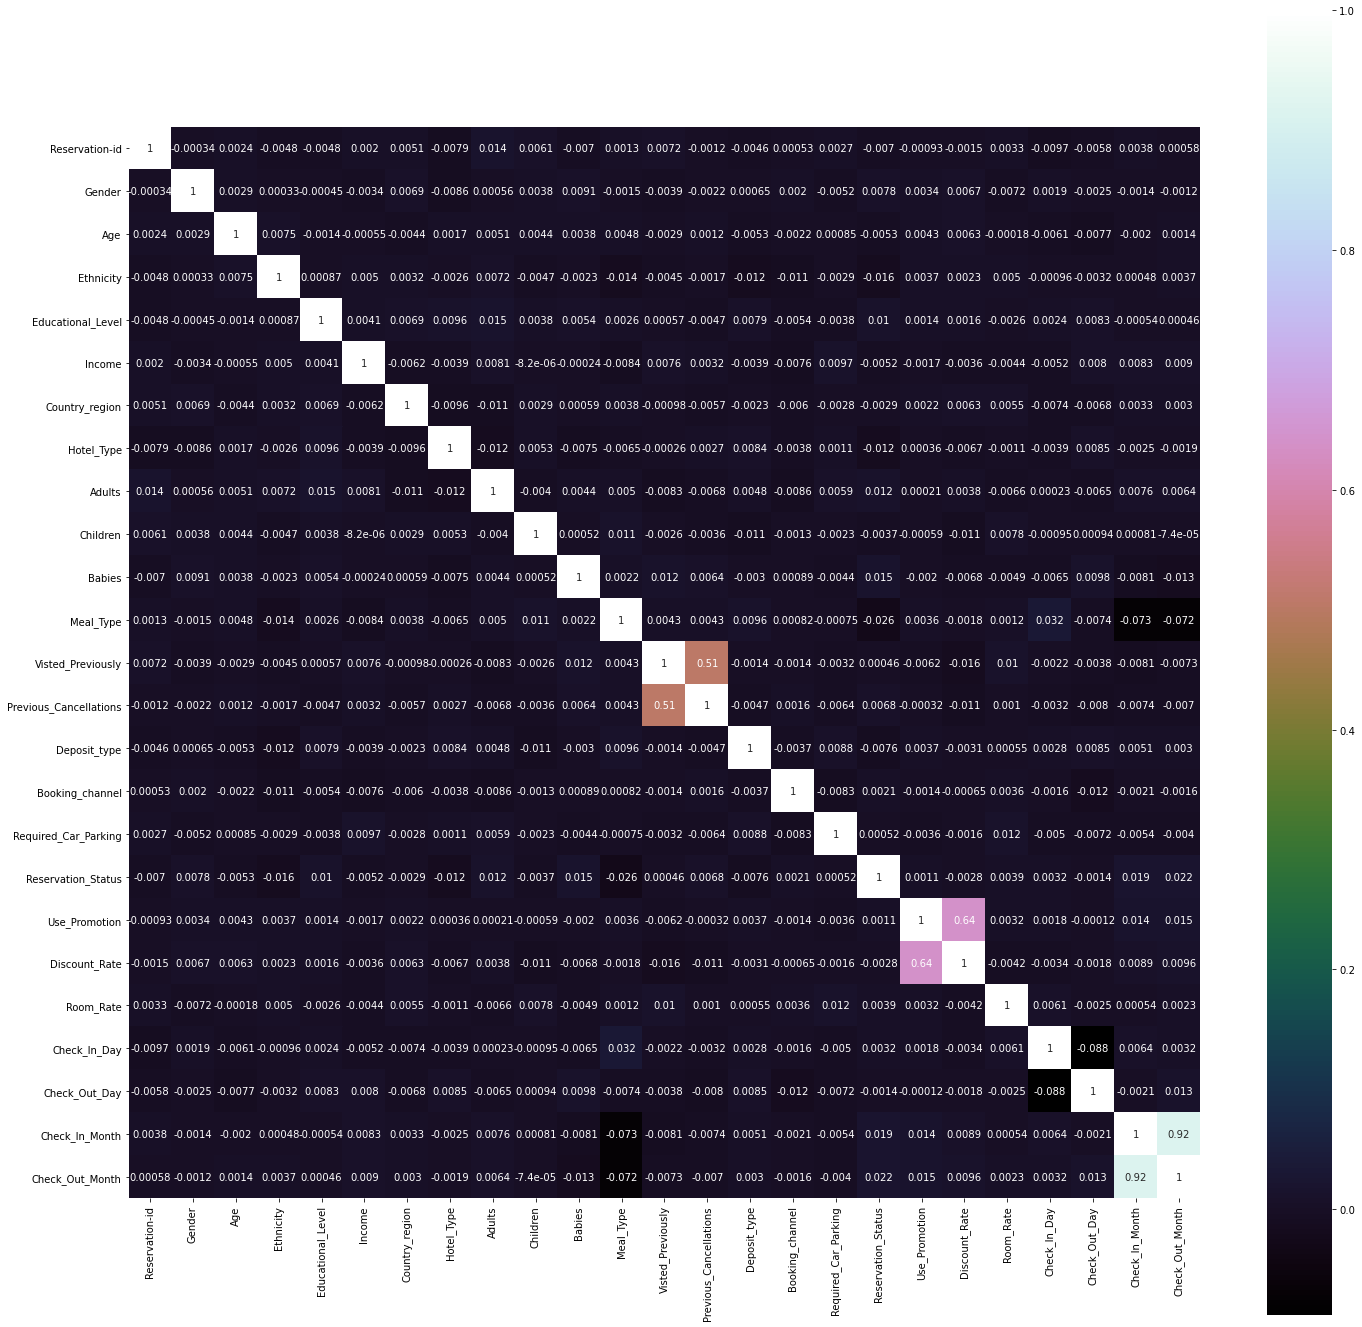

In [9]:
cor = df2.corr()
plt.figure(figsize = (24,24))
sns.heatmap(cor,cmap = 'cubehelix', square = True, annot= True)

<AxesSubplot:>

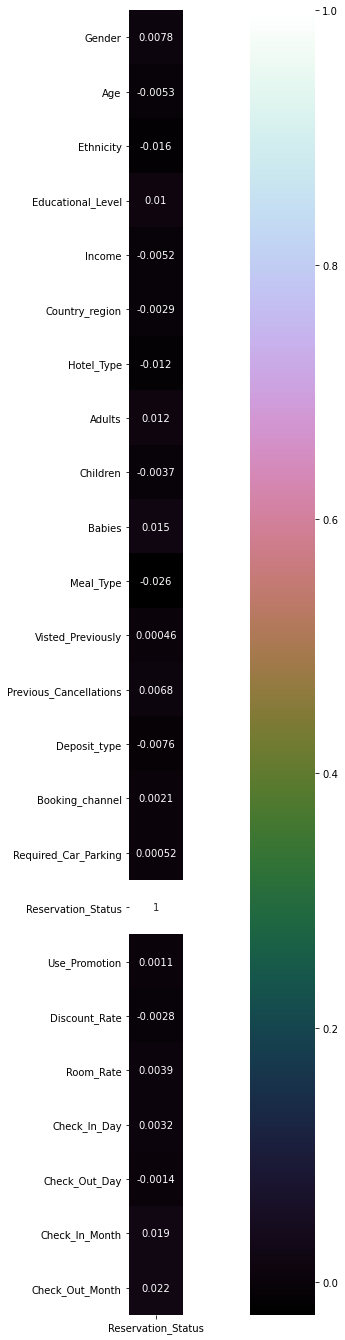

In [10]:
cor = df2.corr()[1:][['Reservation_Status']]
plt.figure(figsize = (24,24))
sns.heatmap(cor,cmap = 'cubehelix', square = True, annot= True)

In [11]:
df2.columns

Index(['Reservation-id', 'Gender', 'Age', 'Ethnicity', 'Educational_Level',
       'Income', 'Country_region', 'Hotel_Type', 'Expected_checkin',
       'Expected_checkout', 'Booking_date', 'Adults', 'Children', 'Babies',
       'Meal_Type', 'Visted_Previously', 'Previous_Cancellations',
       'Deposit_type', 'Booking_channel', 'Required_Car_Parking',
       'Reservation_Status', 'Use_Promotion', 'Discount_Rate', 'Room_Rate',
       'Check_In_Day', 'Check_Out_Day', 'Check_In_Month', 'Check_Out_Month'],
      dtype='object')

In [12]:
# splitting the dataset for the training proocess

X_Train = df2.drop(['Reservation_Status' , 'Reservation-id','Expected_checkin' , 'Expected_checkout' , 'Booking_date'], axis=1)
Y_Train = df2.Reservation_Status

In [13]:
# getting the valaidation data to test our model and splitting it to check the model accuracy

df_val = pd.read_csv('../input/data-storm-20/Hotel-A-validation.csv')


df_val["Check_In_Day"]=pd.DatetimeIndex(df_val['Expected_checkin']).day_name()
df_val["Check_Out_Day"]=pd.DatetimeIndex(df_val['Expected_checkout']).day_name()
df_val["Check_In_Month"]=pd.DatetimeIndex(df_val['Expected_checkin']).month_name()
df_val["Check_Out_Month"]=pd.DatetimeIndex(df_val['Expected_checkout']).month_name()


#creating an instance for label encoder
labelencoder = LabelEncoder()



# assignning numerical values
df_val["Gender"] = labelencoder.fit_transform(df_val["Gender"])
df_val["Ethnicity"] = labelencoder.fit_transform(df_val["Ethnicity"])
df_val["Educational_Level"] = labelencoder.fit_transform(df_val["Educational_Level"])
df_val["Income"] = labelencoder.fit_transform(df_val["Income"])
df_val["Country_region"] = labelencoder.fit_transform(df_val["Country_region"])
df_val["Hotel_Type"] = labelencoder.fit_transform(df_val["Hotel_Type"])
df_val["Meal_Type"] = labelencoder.fit_transform(df_val["Meal_Type"])
df_val["Visted_Previously"] = labelencoder.fit_transform(df_val["Visted_Previously"])
df_val["Previous_Cancellations"] = labelencoder.fit_transform(df_val["Previous_Cancellations"])
df_val["Deposit_type"] = labelencoder.fit_transform(df_val["Deposit_type"])
df_val["Booking_channel"] = labelencoder.fit_transform(df_val["Booking_channel"])
df_val["Required_Car_Parking"] = labelencoder.fit_transform(df_val["Required_Car_Parking"])
df_val["Reservation_Status"] = labelencoder.fit_transform(df_val["Reservation_Status"])
df_val["Use_Promotion"] = labelencoder.fit_transform(df_val["Use_Promotion"])
df_val["Check_In_Day"] = labelencoder.fit_transform(df_val["Check_In_Day"])
df_val["Check_Out_Day"] = labelencoder.fit_transform(df_val["Check_Out_Day"])
df_val["Check_In_Month"] = labelencoder.fit_transform(df_val["Check_In_Month"])
df_val["Check_Out_Month"] = labelencoder.fit_transform(df_val["Check_Out_Month"])


#Standardizing the quantitative variables 
from sklearn.preprocessing import StandardScaler

df_val[['Age', 'Room_Rate']] = StandardScaler().fit_transform(df_val[['Age', 'Room_Rate']])

X_val = df_val.drop(['Reservation_Status' , 'Reservation-id','Expected_checkin' , 'Expected_checkout' , 'Booking_date'], axis=1)
Y_val = df_val.Reservation_Status

In [14]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(X_Train, Y_Train)

RandomForestClassifier()

In [15]:
rf.score(X_val, Y_val)*100

58.56675154601674

In [16]:
pred = rf.predict(X_val)
print(pred)

report = classification_report(Y_val , pred)
print(report)

[1 1 1 ... 1 1 1]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       741
           1       0.59      1.00      0.74      1610
           2       0.00      0.00      0.00       398

    accuracy                           0.59      2749
   macro avg       0.20      0.33      0.25      2749
weighted avg       0.34      0.59      0.43      2749



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Forward feature selecting

In [17]:
#1st step
#Using decision tree for the model splitting the dataset for the training proocess

#X_Train = df2[['Check_In_Month' ,'Meal_Type' , 'Check_Out_Month']]
#Y_Train = df2.Reservation_Status

#X_val = df_val[['Check_In_Month' ,'Meal_Type' , 'Check_Out_Month']]
#Y_val = df_val.Reservation_Status

#from sklearn.ensemble import RandomForestClassifier
#rf = RandomForestClassifier()

#rf.fit(X_Train, Y_Train)
#rf.score(X_val, Y_val)*100

#pred = rf.predict(X_val)
#print(pred)

#report = classification_report(Y_val , pred)
#print(report)

In [18]:
from sklearn.linear_model import LogisticRegression

logistic=LogisticRegression()

logistic.fit(X_Train , Y_Train)

y_pred= logistic.predict(X_val)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_val, y_pred)


0.5856675154601674

In [20]:
report = classification_report(Y_val , y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       741
           1       0.59      1.00      0.74      1610
           2       0.00      0.00      0.00       398

    accuracy                           0.59      2749
   macro avg       0.20      0.33      0.25      2749
weighted avg       0.34      0.59      0.43      2749



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
from sklearn.ensemble import GradientBoostingClassifier

gb=GradientBoostingClassifier(random_state=50)

gb.fit(X_Train,Y_Train)
gb_pred=gb.predict(X_val)

report = classification_report(Y_val , gb_pred)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       741
           1       0.59      1.00      0.74      1610
           2       0.00      0.00      0.00       398

    accuracy                           0.59      2749
   macro avg       0.20      0.33      0.25      2749
weighted avg       0.34      0.59      0.43      2749



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors = 15)

KNN.fit(X_Train , Y_Train)

y_pred= KNN.predict(X_val)

from sklearn.metrics import classification_report , confusion_matrix

print(classification_report(Y_val,y_pred)) 

              precision    recall  f1-score   support

           0       0.40      0.00      0.01       741
           1       0.59      1.00      0.74      1610
           2       0.00      0.00      0.00       398

    accuracy                           0.59      2749
   macro avg       0.33      0.33      0.25      2749
weighted avg       0.45      0.59      0.43      2749



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Predicting the test data set and getting the final output

In [23]:
# Importing and prepairing the test dataset

dftest = pd.read_csv('../input/data-storm-20/Hotel-A-test.csv')

#creating an instance for label encoder
labelencoder = LabelEncoder()

dftest["Check_In_Day"]=pd.DatetimeIndex(dftest['Expected_checkin']).day_name()
dftest["Check_Out_Day"]=pd.DatetimeIndex(dftest['Expected_checkout']).day_name()
dftest["Check_In_Month"]=pd.DatetimeIndex(dftest['Expected_checkin']).month_name()
dftest["Check_Out_Month"]=pd.DatetimeIndex(dftest['Expected_checkout']).month_name()


# assignning numerical values
dftest["Gender"] = labelencoder.fit_transform(dftest["Gender"])
dftest["Ethnicity"] = labelencoder.fit_transform(dftest["Ethnicity"])
dftest["Educational_Level"] = labelencoder.fit_transform(dftest["Educational_Level"])
dftest["Income"] = labelencoder.fit_transform(dftest["Income"])
dftest["Country_region"] = labelencoder.fit_transform(dftest["Country_region"])
dftest["Hotel_Type"] = labelencoder.fit_transform(dftest["Hotel_Type"])
dftest["Meal_Type"] = labelencoder.fit_transform(dftest["Meal_Type"])
dftest["Visted_Previously"] = labelencoder.fit_transform(dftest["Visted_Previously"])
dftest["Previous_Cancellations"] = labelencoder.fit_transform(dftest["Previous_Cancellations"])
dftest["Deposit_type"] = labelencoder.fit_transform(dftest["Deposit_type"])
dftest["Booking_channel"] = labelencoder.fit_transform(dftest["Booking_channel"])
dftest["Required_Car_Parking"] = labelencoder.fit_transform(dftest["Required_Car_Parking"])
dftest["Use_Promotion"] = labelencoder.fit_transform(dftest["Use_Promotion"])
dftest["Check_In_Day"] = labelencoder.fit_transform(dftest["Check_In_Day"])
dftest["Check_Out_Day"] = labelencoder.fit_transform(dftest["Check_Out_Day"])
dftest["Check_In_Month"] = labelencoder.fit_transform(dftest["Check_In_Month"])
dftest["Check_Out_Month"] = labelencoder.fit_transform(dftest["Check_Out_Month"])

dftest['Expected_checkin'] = pd.to_datetime(dftest['Expected_checkin']) 
dftest['Expected_checkout'] = pd.to_datetime(dftest['Expected_checkout']) 

dftest['days'] = labelencoder.fit_transform(dftest['Expected_checkout'] - dftest['Expected_checkin'])

#Standardizing the quantitative variables 
from sklearn.preprocessing import StandardScaler

dftest[['Age', 'Room_Rate']] = StandardScaler().fit_transform(dftest[['Age', 'Room_Rate']])

X_test = dftest.drop([ 'Reservation-id','Expected_checkin' , 'Expected_checkout' , 'Booking_date'], axis=1)


In [24]:
dftest.dtypes

Reservation-id                     int64
Gender                             int64
Age                              float64
Ethnicity                          int64
Educational_Level                  int64
Income                             int64
Country_region                     int64
Hotel_Type                         int64
Expected_checkin          datetime64[ns]
Expected_checkout         datetime64[ns]
Booking_date                      object
Adults                             int64
Children                           int64
Babies                             int64
Meal_Type                          int64
Visted_Previously                  int64
Previous_Cancellations             int64
Deposit_type                       int64
Booking_channel                    int64
Required_Car_Parking               int64
Use_Promotion                      int64
Discount_Rate                      int64
Room_Rate                        float64
Check_In_Day                       int64
Check_Out_Day   

In [25]:
df2['Expected_checkin'] = pd.to_datetime(df2['Expected_checkin']) 
df2['Expected_checkout'] = pd.to_datetime(df2['Expected_checkout']) 

In [26]:
df2['days'] = labelencoder.fit_transform(df2['Expected_checkout'] - df2['Expected_checkin'])

In [27]:
df2

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,...,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate,Check_In_Day,Check_Out_Day,Check_In_Month,Check_Out_Month,days
0,39428300,0,-0.259916,2,1,2,1,1,2015-07-01,2015-07-02,...,1,1,1,10,0.976918,6,4,5,5,0
1,77491756,0,0.328209,2,3,1,0,1,2015-07-01,2015-07-02,...,1,1,0,0,0.224803,6,4,5,5,0
2,73747291,0,-0.129221,3,1,2,0,1,2015-07-02,2015-07-06,...,1,1,0,0,-1.279426,4,1,5,5,3
3,67301739,1,-1.240124,0,0,3,2,0,2015-07-02,2015-07-03,...,1,1,1,5,-0.709642,4,0,5,5,0
4,77222321,0,1.177723,2,2,0,0,2,2015-07-03,2015-07-04,...,0,1,1,10,1.523910,0,2,5,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27494,15645505,0,0.328209,0,3,2,3,1,2016-08-31,2016-09-01,...,1,1,1,10,-1.712462,6,4,1,11,0
27495,56414525,0,0.328209,1,0,0,2,0,2016-08-31,2016-09-01,...,1,2,1,40,0.429925,6,4,1,11,0
27496,52023375,0,0.328209,2,2,1,2,0,2016-09-01,2016-09-02,...,1,1,1,5,0.612256,4,0,11,11,0
27497,98041387,1,1.373765,0,0,0,2,0,2016-08-31,2016-09-01,...,0,0,1,20,-0.413355,6,4,1,11,0


In [28]:
X_Train = df2.drop(['Reservation_Status' , 'Reservation-id','Expected_checkin' , 'Expected_checkout' , 'Booking_date'], axis=1)
Y_Train = df2.Reservation_Status

X_Train

,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Adults,Children,Babies,...,Booking_channel,Required_Car_Parking,Use_Promotion,Discount_Rate,Room_Rate,Check_In_Day,Check_Out_Day,Check_In_Month,Check_Out_Month,days
0,0,-0.259916,2,1,2,1,1,2,2,0,...,2,1,1,10,0.976918,6,4,5,5,0
1,0,0.328209,2,3,1,0,1,3,3,0,...,2,1,0,0,0.224803,6,4,5,5,0
2,0,-0.129221,3,1,2,0,1,3,3,0,...,2,1,0,0,-1.279426,4,1,5,5,3
3,1,-1.240124,0,0,3,2,0,4,3,0,...,0,1,1,5,-0.709642,4,0,5,5,0
4,0,1.177723,2,2,0,0,2,1,1,0,...,1,0,1,10,1.523910,0,2,5,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27494,0,0.328209,0,3,2,3,1,1,2,1,...,2,1,1,10,-1.712462,6,4,1,11,0
27495,0,0.328209,1,0,0,2,0,2,1,0,...,0,1,1,40,0.429925,6,4,1,11,0
27496,0,0.328209,2,2,1,2,0,2,1,1,...,1,1,1,5,0.612256,4,0,11,11,0
27497,1,1.373765,0,0,0,2,0,3,2,0,...,2,0,1,20,-0.413355,6,4,1,11,0


In [29]:


df_val['Expected_checkin'] = pd.to_datetime(df_val['Expected_checkin']) 
df_val['Expected_checkout'] = pd.to_datetime(df_val['Expected_checkout']) 

df_val['days'] = labelencoder.fit_transform(df_val['Expected_checkout'] - df_val['Expected_checkin'])

X_val = df_val.drop(['Reservation_Status' , 'Reservation-id','Expected_checkin' , 'Expected_checkout' , 'Booking_date'], axis=1)
Y_val = df_val.Reservation_Status

# Final model with the added 'days'(Number of days) variable

In [30]:

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 25)

rf.fit(X_Train, Y_Train)
rf.score(X_val, Y_val)*100

pred = rf.predict(X_val)
print(pred)

report = classification_report(Y_val , pred)
print(report)

[1 1 1 ... 1 1 1]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       741
           1       0.59      1.00      0.74      1610
           2       0.00      0.00      0.00       398

    accuracy                           0.59      2749
   macro avg       0.20      0.33      0.25      2749
weighted avg       0.34      0.59      0.43      2749



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
df2.head()

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,...,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate,Check_In_Day,Check_Out_Day,Check_In_Month,Check_Out_Month,days
0,39428300,0,-0.259916,2,1,2,1,1,2015-07-01,2015-07-02,...,1,1,1,10,0.976918,6,4,5,5,0
1,77491756,0,0.328209,2,3,1,0,1,2015-07-01,2015-07-02,...,1,1,0,0,0.224803,6,4,5,5,0
2,73747291,0,-0.129221,3,1,2,0,1,2015-07-02,2015-07-06,...,1,1,0,0,-1.279426,4,1,5,5,3
3,67301739,1,-1.240124,0,0,3,2,0,2015-07-02,2015-07-03,...,1,1,1,5,-0.709642,4,0,5,5,0
4,77222321,0,1.177723,2,2,0,0,2,2015-07-03,2015-07-04,...,0,1,1,10,1.523910,0,2,5,5,0


In [32]:
dftest1 = pd.read_csv('../input/data-storm-20/Hotel-A-test.csv')
dftest1.head()

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,...,Babies,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Use_Promotion,Discount_Rate,Room_Rate
0,62931593,F,52,Latino,Grad,25K --50K,South,City Hotel,11/18/2016,11/19/2016,...,0,HB,No,No,No Deposit,Direct,Yes,Yes,10,153
1,70586099,F,47,Latino,Grad,25K --50K,East,Airport Hotels,11/18/2016,11/19/2016,...,0,FB,No,No,No Deposit,Online,No,No,0,210
2,4230648,F,28,Asian American,Grad,<25K,East,City Hotel,4/28/2017,5/1/2017,...,0,BB,No,No,No Deposit,Agent,No,Yes,5,117
3,25192322,F,65,caucasian,High-School,25K --50K,South,Airport Hotels,11/18/2016,11/20/2016,...,2,FB,No,No,No Deposit,Online,Yes,Yes,10,107
4,80931528,M,45,African American,College,25K --50K,South,City Hotel,11/18/2016,11/20/2016,...,0,BB,No,No,Refundable,Agent,No,No,0,119


# Calculating the expected revenue loss

In [33]:
pred = rf.predict(X_test)
dftest['Reservation_Status'] = pred

dftest['Expected_checkin'] = pd.to_datetime(dftest['Expected_checkin']) 
dftest['Expected_checkout'] = pd.to_datetime(dftest['Expected_checkout']) 

dftest['Room_Rate'] = dftest1['Room_Rate']
dftest['days'] = dftest['Expected_checkout'] -  dftest['Expected_checkin']
dftest.head()

dftest['loss'] = dftest['Room_Rate'] * dftest['days']
dftest.head()

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,...,Use_Promotion,Discount_Rate,Room_Rate,Check_In_Day,Check_Out_Day,Check_In_Month,Check_Out_Month,days,Reservation_Status,loss
0,62931593,0,0.538283,2,1,0,2,1,2016-11-18,2016-11-19,...,1,10,153,0,2,9,9,1 days,1,153 days
1,70586099,0,0.210528,2,1,0,0,0,2016-11-18,2016-11-19,...,0,0,210,0,2,9,9,1 days,1,210 days
2,4230648,0,-1.034940,1,1,2,0,1,2017-04-28,2017-05-01,...,1,5,117,0,1,0,8,3 days,1,351 days
3,25192322,0,1.390445,3,2,0,2,0,2016-11-18,2016-11-20,...,1,10,107,0,3,9,9,2 days,1,214 days
4,80931528,1,0.079426,0,0,0,2,1,2016-11-18,2016-11-20,...,0,0,119,0,3,9,9,2 days,1,238 days


In [34]:
dftest['loss'] = dftest['loss'].dt.days
dftest.head()

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,...,Use_Promotion,Discount_Rate,Room_Rate,Check_In_Day,Check_Out_Day,Check_In_Month,Check_Out_Month,days,Reservation_Status,loss
0,62931593,0,0.538283,2,1,0,2,1,2016-11-18,2016-11-19,...,1,10,153,0,2,9,9,1 days,1,153
1,70586099,0,0.210528,2,1,0,0,0,2016-11-18,2016-11-19,...,0,0,210,0,2,9,9,1 days,1,210
2,4230648,0,-1.034940,1,1,2,0,1,2017-04-28,2017-05-01,...,1,5,117,0,1,0,8,3 days,1,351
3,25192322,0,1.390445,3,2,0,2,0,2016-11-18,2016-11-20,...,1,10,107,0,3,9,9,2 days,1,214
4,80931528,1,0.079426,0,0,0,2,1,2016-11-18,2016-11-20,...,0,0,119,0,3,9,9,2 days,1,238


In [35]:
dftest.head()

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,...,Use_Promotion,Discount_Rate,Room_Rate,Check_In_Day,Check_Out_Day,Check_In_Month,Check_Out_Month,days,Reservation_Status,loss
0,62931593,0,0.538283,2,1,0,2,1,2016-11-18,2016-11-19,...,1,10,153,0,2,9,9,1 days,1,153
1,70586099,0,0.210528,2,1,0,0,0,2016-11-18,2016-11-19,...,0,0,210,0,2,9,9,1 days,1,210
2,4230648,0,-1.034940,1,1,2,0,1,2017-04-28,2017-05-01,...,1,5,117,0,1,0,8,3 days,1,351
3,25192322,0,1.390445,3,2,0,2,0,2016-11-18,2016-11-20,...,1,10,107,0,3,9,9,2 days,1,214
4,80931528,1,0.079426,0,0,0,2,1,2016-11-18,2016-11-20,...,0,0,119,0,3,9,9,2 days,1,238


In [36]:
loss_cancelled = dftest.loc[dftest['Reservation_Status'] == 0, 'loss'].sum()
loss_no_show = dftest.loc[dftest['Reservation_Status'] == 2, 'loss'].sum()

Total_cost = loss_cancelled + loss_no_show
print('The Total revenue lost is ' , Total_cost)

The Total revenue lost is  1244
